In [120]:
import serial
import matplotlib.pyplot as plt

#Collecting data from serial port and convert to list of decimal integers

SerialData = serial.Serial('com3',115200)
count = 0
ListData = []

while True:
    if (SerialData.read() == b'\x00'):
        break

while True:#(count<115200):
    Data = SerialData.read()
    if (Data != b'\x00'):
        ListData.append(Data)
        #count += 1
    else:
        break

SerialData.close()

CleanData = []
for i in range(len(ListData)):
    CleanData.append(int.from_bytes(ListData[i], "big"))
print(CleanData)

[127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 127, 127, 127, 127, 128, 128, 127, 128, 127, 128, 128, 127, 127, 127, 127, 127, 128, 127, 127, 127, 128, 128, 127, 128, 128, 127, 127, 127, 128, 128, 127, 127, 128, 127, 128, 127, 128, 127, 127, 127, 128, 128, 128, 127, 128, 128, 127, 127, 127, 128, 127, 127, 127, 127, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 129, 130, 129, 130, 130, 130, 129, 129, 130, 130, 129, 129, 129, 130, 130, 129, 130, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 129, 129, 129, 130, 129, 130, 130, 130, 129, 129, 129, 130, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,

In [121]:
from scipy.io.wavfile import read, write
import io
import numpy

BytesData = numpy.array(CleanData, 'uint8')
print(BytesData)
#bytes_wav = bytes()
#byte_io = io.BytesIO(bytes_wav)
write('output.wav', 8000, BytesData)

#output_wav = byte_io.read()

[127 127 127 ... 126 127 124]


In [122]:
from scipy.io.wavfile import read, write
import io
import numpy


with open("output.wav", "rb") as wavfile:
    input_wav = wavfile.read()

rate, data = read(io.BytesIO(input_wav))
newListData = []
for i in range(len(data)):
    newListData.append(int.to_bytes(int(data[i]), 1, "big"))

print(rate)
print(newListData)

8000
[b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x80', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x7f', b'\x80', b'\x7f', b'\x80', b'\x7f', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x80', b'\x7f', b'\x80', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x7f', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x80', b'\x81', b'\x80', b'\x80', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x81', b'\x82', b'\x82', b'\x

In [123]:
import serial
SerialData = serial.Serial('com3',115200)
for i in range(len(newListData)):
    output = SerialData.write(newListData[i])
#output = SerialData.write(b'\x00')
SerialData.close()

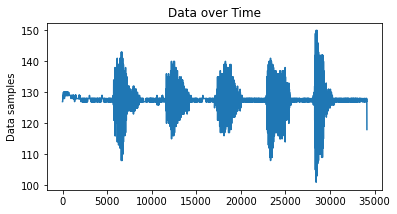

In [7]:
#Creating plot from data
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.clear()
ax.plot(range(len(CleanData)), CleanData)
plt.subplots_adjust(bottom=0.30)
plt.title('Data over Time')
plt.ylabel('Data samples')
plt.show()